<a href="https://colab.research.google.com/github/SwagatikaBiswal/UTS_ML2019_ID13180144/blob/master/A2_13180144.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lending club loan data analytics project
Name -         Swagatika Biswal
Student id -   13180144
Subject code - 32513

#Introduction

With the rising demands of money lending platforms, interested investors have been easily lending money to the borrowers and managing the potential returns. However, the process of peer to peer investments is always associated with potential risks for investors in cases of bad debts. Whether the lent sum is going to fully paid by the borrowers or significant amounts needs to be charged off has always been a matter of worry for them.
Lending Club has been operating as a money lending platform in the United States for more than 10 years and successful in connecting the interested investors and potential borrowers.
This machine learning project is built to deal with this real-world problem of the investors by providing them predicted probabilities on the loans that will charge off and they won’t receive full payments in due course. The data set has been collected from Kaggle for the year 2018, as lending club members only can access the data directly from the organisation ‘s website.  
I have attempted to use the features/information that are available to the investors before issuing a loan, which are the ones with successful lending club listings. The marketplace conducts a thorough credit review and then accept or rejects the loan application before lists them. 
The dataset has 236058 rows and 151 columns with a large number of missing values in it. I have performed data pre-processing, , data visualisation, exploration and analysis then built and assessed the classification models for better results.



#Import data

In [0]:
# Install packages
!pip install -U -q PyDrive

# Import libraies and packages
import os
import numpy as npy
import pandas as pds
import matplotlib.pyplot as plt 
import seaborn as sns
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

# Mount data from Google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
# Authenticate and create the PyDrive client
auth.authenticate_user()
google_auth = GoogleAuth()
google_auth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(google_auth)

Mounted at /content/gdrive


In [0]:

#import dataset
My_df = pds.read_excel('/content/gdrive/My Drive/Lending club data_2018.xlsx')
print(My_df)

               id  member_id  ...  settlement_percentage  settlement_term
0       130954621        NaN  ...                    NaN              NaN
1       130964697        NaN  ...                    NaN              NaN
2       130955326        NaN  ...                    NaN              NaN
3       130504052        NaN  ...                    NaN              NaN
4       130956066        NaN  ...                    NaN              NaN
5       130502727        NaN  ...                    NaN              NaN
6       130258413        NaN  ...                    NaN              NaN
7       129913276        NaN  ...                    NaN              NaN
8       130968790        NaN  ...                    NaN              NaN
9       130711441        NaN  ...                    NaN              NaN
10      130960818        NaN  ...                    NaN              NaN
11      130965455        NaN  ...                    NaN              NaN
12      130967847        NaN  ...     

In [0]:
#import data dictionary
data_dictionary = pds.read_excel('/content/gdrive/My Drive/Lending club loan data dictionary.xlsx')
print(data_dictionary)

                                    LoanStatNew                                        Description
0                                acc_now_delinq  The number of accounts on which the borrower i...
1                          acc_open_past_24mths         Number of trades opened in past 24 months.
2                                    addr_state  The state provided by the borrower in the loan...
3                                      all_util              Balance to credit limit on all trades
4                                    annual_inc  The self-reported annual income provided by th...
5                              annual_inc_joint  The combined self-reported annual income provi...
6                              application_type  Indicates whether the loan is an individual ap...
7                                   avg_cur_bal            Average current balance of all accounts
8                                bc_open_to_buy          Total open to buy on revolving bankcards.
9         

In [0]:
#Dataset dimensions
print(My_df.shape)

(236058, 151)


In [0]:
#head
print(My_df.head(5))

          id  member_id  ...  settlement_percentage  settlement_term
0  130954621        NaN  ...                    NaN              NaN
1  130964697        NaN  ...                    NaN              NaN
2  130955326        NaN  ...                    NaN              NaN
3  130504052        NaN  ...                    NaN              NaN
4  130956066        NaN  ...                    NaN              NaN

[5 rows x 151 columns]


In [0]:
#dataset information
My_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236058 entries, 0 to 236057
Columns: 151 entries, id to settlement_term
dtypes: datetime64[ns](11), float64(59), int64(56), object(25)
memory usage: 271.9+ MB


#Exploration

##Initial data cleaning

To deal with the missing values 43 features with more than 30% of missing data are dropped from the dataset.

After going through the data dictionary and understanding the variables, 78 attributes are found to be unknown to the investors before making an investment, and deleted from the data set as the goal of the project to predict the credit risk associated with the loans before issuing those.

Output categorical target variable “loan_status” has 7 different loan statuses, from where fully paid and charged-off status information are filtered out and encoded into following Boolean types for better results.

{"Fully Paid":1, "Charged Off":0}

29 features with 32834 rows are selected for further analysis.

##Exploration and feature selection

A correlation matrix is plotted to explore the correlation between the numerical attributes. loan_amnt, instalment, fico_range_low, fico_range_high, mort_acc are found to hold (+-)0.9 or above correlation coefficient. Higher are the value of loan amounts, the number of instalments and mortgage accounts higher is the probability of charge off, and lesser is the probability of loan refunds. On the other hand, higher is the FICO score(credit score) lower is the risk of the loan being charged off. 
Higher is the annual_inc of the borrower, higher will be chances of loan refund, and lesser will be the probability of bad debts.

Variables are explored in detail along with the statistics summary, box plots, scatter matrix, histograms, bar plots to understand their effect on the target variable. A very smaller percentage (1.1%) of the outliers in the “int_rate” attribute dropped from the data set.

Categorical variables “grade”, “zip_code" are found similar to “sub_grade”, “addr_state” respectively, therefore dropped from the data set. “emp_title” variable holds too many titles, so can’t be useful in this model and dropped. Few other categorical variables are turned into dummy variables using Pandas library functions. 


#Data cleaning

1.Drop columns with more than 30% missing data


In [0]:
#Missing data fractions
missing_data_fractions = My_df.isnull().mean().sort_values(ascending=False)
missing_data_fractions.head(15)

member_id                                     1.000000
desc                                          1.000000
orig_projected_additional_accrued_interest    0.998996
hardship_start_date                           0.998835
hardship_end_date                             0.998835
payment_plan_start_date                       0.998835
hardship_length                               0.998835
hardship_dpd                                  0.998835
hardship_loan_status                          0.998835
hardship_last_payment_amount                  0.998835
hardship_payoff_balance_amount                0.998835
hardship_amount                               0.998835
hardship_status                               0.998835
hardship_reason                               0.998835
hardship_type                                 0.998835
dtype: float64

In [0]:
#Missing data value counts
missing_data_fractions.value_counts()

0.000000    89
0.998835    13
0.855476    13
0.998594     6
0.037698     2
1.000000     2
0.000017     1
0.559540     1
0.000008     1
0.028646     1
0.001178     1
0.953236     1
0.000093     1
0.163087     1
0.001233     1
0.139093     1
0.013797     1
0.712329     1
0.998996     1
0.768739     1
0.013374     1
0.802070     1
0.097645     1
0.865516     1
0.013399     1
0.012586     1
0.002410     1
0.125664     1
0.083941     1
0.868778     1
0.000241     1
0.858103     1
dtype: int64

In [0]:
#Missing data fractions against the data features
#151 features contain missing data
missing_data_fractions

member_id                                     1.000000
desc                                          1.000000
orig_projected_additional_accrued_interest    0.998996
hardship_start_date                           0.998835
hardship_end_date                             0.998835
payment_plan_start_date                       0.998835
hardship_length                               0.998835
hardship_dpd                                  0.998835
hardship_loan_status                          0.998835
hardship_last_payment_amount                  0.998835
hardship_payoff_balance_amount                0.998835
hardship_amount                               0.998835
hardship_status                               0.998835
hardship_reason                               0.998835
hardship_type                                 0.998835
deferral_term                                 0.998835
settlement_percentage                         0.998594
settlement_term                               0.998594
debt_settl

In [0]:
#List the attributes with more than 30% of missing data
drop_missingdata = sorted(list(missing_data_fractions[missing_data_fractions > 0.3].index))
print(drop_missingdata)

['annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_major_derog', 'sec_app_num_rev_accts', 'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_revol_util', 'settlement_amount', 'settlement_date', 'settlement_percentage', 'settlement_status', 'se

In [0]:
#43 features contain more than 30% of missing data
len(drop_missingdata)

43

In [0]:
#Drop the attributes with more than 30% of missing data
#108 features remained in data frame
My_df.drop(labels=drop_missingdata, axis=1, inplace=True)
My_df.shape

(236058, 108)

2. Drop the attributes that are unknown/unavailable to the investors at the time of lending the money to the borrowers

   I have tried to Understand the attribute definitions in the data dictionary and filter out the possible unavailable features.      When any borrower lists the loan request in the marketplace, not every variable present in the data frame are actually known. 

In [0]:
#print all the fetaures in the data frame
print(sorted(My_df.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'id', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_inq', 'next_pymnt_d', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num

In [0]:
#Identify unknown features by looking at data dictionary
# Length of unknown features
Unknown_features= ['funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag','open_acc_6m', 'open_act_il', 'open_il_12m',
                   'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util','issue_d','open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi','total_cu_tl', 'inq_last_12m', 'url', 'next_pymnt_d']
len(Unknown_features)

78

In [0]:
#Drop unknown attributes
#Features and rows remained in the data frame
My_df.drop(labels=Unknown_features, axis=1, inplace=True)
My_df.shape


(236058, 30)

In [0]:
#Print columns reamined in the data frame
My_df.columns


Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

3. delete unique listing id "id"as its irrelevant

In [0]:
#delete id column
del My_df['id']
My_df.shape


(236058, 29)

4. Output variable "loan_status"

In [0]:
#loan_status value counts
My_df['loan_status'].value_counts()

Current               197139
Fully Paid             27434
Charged Off             5400
Late (31-120 days)      3892
In Grace Period         1434
Late (16-30 days)        754
Default                    5
Name: loan_status, dtype: int64

As the object of the project is to predict the probability of bad debts/charge off loans. It is convenient to choose Fully paid and charged off loan statuses.

In [0]:
#Select the data rows with loan_status 'Fully Paid','Charged Off'
My_df = My_df.loc[My_df['loan_status'].isin(['Fully Paid','Charged Off'])]

In [0]:
#Unbalanced data set
My_df['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.835536
Charged Off    0.164464
Name: loan_status, dtype: float64

In [0]:
#data remained in the data frame
My_df.shape

(32834, 29)

Encoding the loan_status into boolean

In [0]:
data_slice = My_df[(My_df['loan_status']=="Fully Paid") | (My_df['loan_status']=="Charged Off")]
ls = {"Fully Paid":1, "Charged Off":0}
My_df_targetboolean= data_slice.replace({"loan_status": ls})

In [0]:
My_df_targetboolean.loan_status

4         1
16        1
23        1
38        1
40        1
42        1
50        1
68        1
71        1
73        1
81        1
87        0
95        0
101       1
109       1
121       1
125       1
126       1
128       1
134       1
137       1
158       0
161       0
163       1
167       1
176       1
183       0
184       0
185       1
188       1
         ..
235793    1
235794    0
235817    1
235839    1
235842    1
235844    1
235845    1
235866    1
235874    1
235875    1
235879    1
235880    1
235904    1
235913    1
235923    1
235926    1
235929    1
235931    0
235939    0
235957    1
235960    1
235970    1
235973    1
236003    1
236015    0
236017    1
236025    1
236028    1
236046    1
236049    0
Name: loan_status, Length: 32834, dtype: int64

In [0]:
My_df_targetboolean.shape

(32834, 29)

In [0]:
My_df_targetboolean.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [0]:
#Selected data information
My_df_targetboolean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32834 entries, 4 to 236049
Data columns (total 29 columns):
loan_amnt               32834 non-null int64
term                    32834 non-null object
int_rate                32834 non-null float64
installment             32834 non-null float64
grade                   32834 non-null object
sub_grade               32834 non-null object
emp_title               29779 non-null object
emp_length              29968 non-null object
home_ownership          32834 non-null object
annual_inc              32834 non-null float64
verification_status     32834 non-null object
loan_status             32834 non-null int64
purpose                 32834 non-null object
title                   32834 non-null object
zip_code                32834 non-null object
addr_state              32834 non-null object
dti                     32738 non-null float64
earliest_cr_line        32834 non-null datetime64[ns]
fico_range_low          32834 non-null int64
fico_ra

#Data exploration and feature selection

1. Numerical attributes explortaion and feature selection

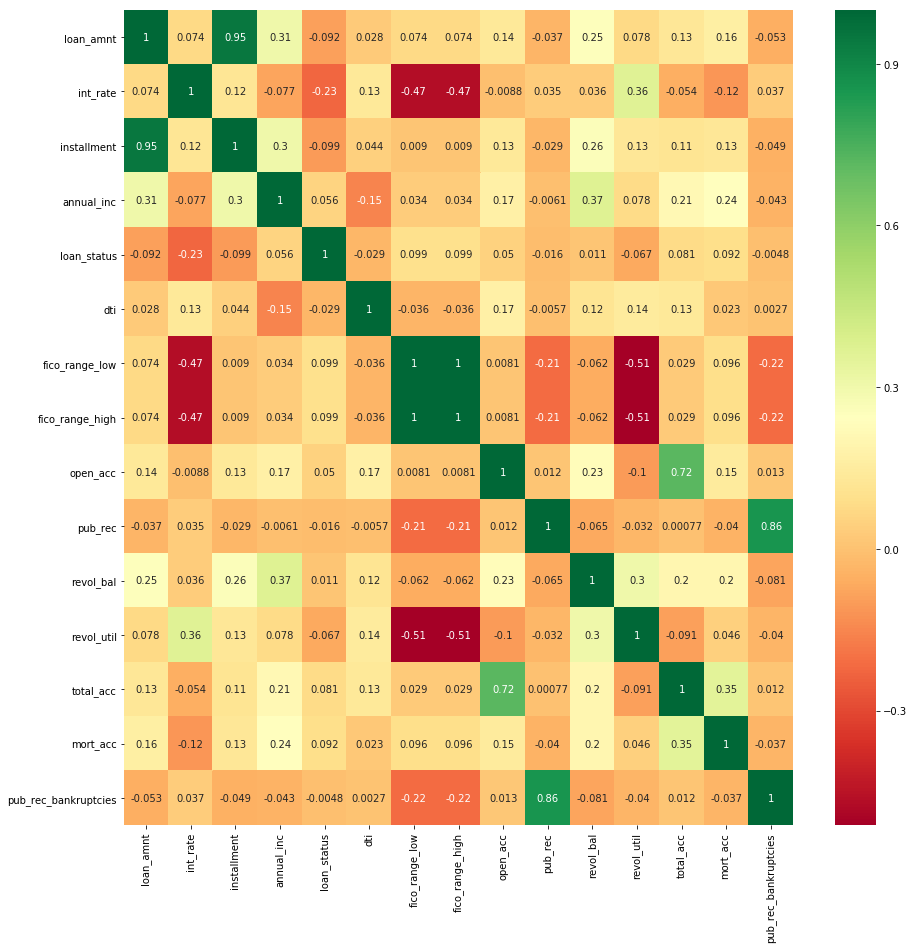

In [0]:
#Correlation matrix
correlations = My_df_targetboolean.corr()
top_features = correlations.index
plt.figure(figsize=(15,15))
sns.heatmap(My_df_targetboolean[top_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
print(correlations)

                      loan_amnt  int_rate  ...  mort_acc  pub_rec_bankruptcies
loan_amnt              1.000000  0.073719  ...  0.164416             -0.052943
int_rate               0.073719  1.000000  ... -0.116018              0.036652
installment            0.951738  0.119917  ...  0.129708             -0.048590
annual_inc             0.306943 -0.076969  ...  0.242434             -0.043039
loan_status           -0.091598 -0.225342  ...  0.092250             -0.004810
dti                    0.028366  0.132498  ...  0.022981              0.002746
fico_range_low         0.074410 -0.469908  ...  0.095600             -0.217042
fico_range_high        0.074413 -0.469906  ...  0.095605             -0.217040
open_acc               0.136472 -0.008769  ...  0.146948              0.013429
pub_rec               -0.036933  0.035124  ... -0.040172              0.855741
revol_bal              0.252849  0.035581  ...  0.199789             -0.081026
revol_util             0.077803  0.361841  ...  0.04

In [0]:
top_features


Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'fico_range_low', 'fico_range_high', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [0]:
My_df_targetboolean.shape

(32834, 29)

Exploration of features

In [0]:
#Dataset statistics summary
print(My_df_targetboolean.describe())

          loan_amnt      int_rate  ...      mort_acc  pub_rec_bankruptcies
count  32834.000000  32834.000000  ...  32834.000000          32834.000000
mean   15009.659195     13.429783  ...      1.538893              0.143723
std    10109.042975      5.539633  ...      1.838290              0.356925
min     1000.000000      5.310000  ...      0.000000              0.000000
25%     7000.000000      9.440000  ...      0.000000              0.000000
50%    12000.000000     12.620000  ...      1.000000              0.000000
75%    20000.000000     16.910000  ...      3.000000              0.000000
max    40000.000000     30.990000  ...     24.000000              3.000000

[8 rows x 15 columns]


In [0]:
# kde plot of attribute gropued by loan_status
def feature_plot(var_name, continuous):     
    if continuous:  
        facet = sns.FacetGrid(My_df, hue = 'loan_status', height=2.5, aspect=3.5)
        facet.map(sns.kdeplot, var_name, shade=True)
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=var_name, hue='loan_status', data=My_df, order=sorted(My_df[var_name].unique()) )
     
    plt.tight_layout()

**Feature loan_amnt**


In [0]:
#Statstics
My_df['loan_amnt'].describe()

count    32834.000000
mean     15009.659195
std      10109.042975
min       1000.000000
25%       7000.000000
50%      12000.000000
75%      20000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

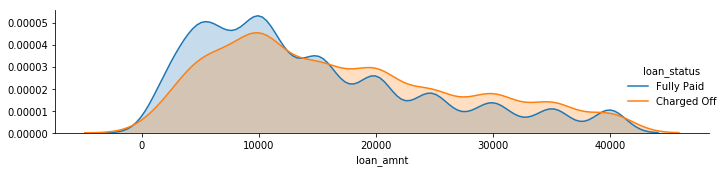

In [0]:
#Higher the loan amount, higher is the chance of cahrged off
feature_plot('loan_amnt', continuous=True)

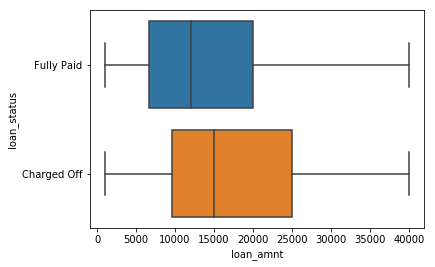

In [0]:
ax = sns.boxplot(x="loan_amnt", y="loan_status", data=My_df)

**Feature 'term'**

In [0]:
#Loans of 60 months(5 years) are more probable for charge offs than 36 months(3 years)
My_df.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
 36 months    0.138261
 60 months    0.235949
Name: loan_status, dtype: float64

**Feature int_rate**

In [0]:
#Statstics
My_df['int_rate'].describe()

count    32834.000000
mean        13.429783
std          5.539633
min          5.310000
25%          9.440000
50%         12.620000
75%         16.910000
max         30.990000
Name: int_rate, dtype: float64

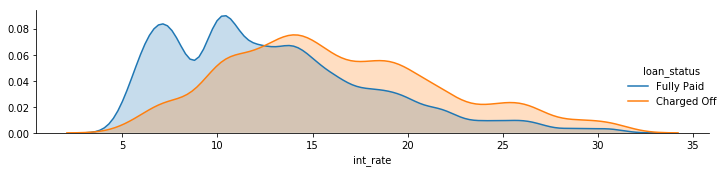

In [0]:
#Higher are the interest rates, higher are the chances of charge offs
feature_plot('int_rate', continuous=True)

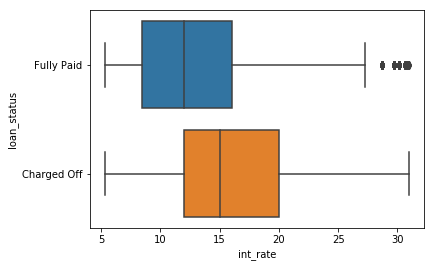

In [0]:
ax = sns.boxplot(x="int_rate", y="loan_status", data=My_df)
#outliers detected for fully paid loans 

In [0]:
Q1 =  My_df['int_rate'].quantile(0.25)
Q3 = My_df['int_rate'].quantile(0.75)
IQR = Q3 - Q1

In [0]:
My_df[(My_df['int_rate'] < Q1-1.5*IQR ) | (My_df['int_rate'] > Q3+1.5*IQR)]['int_rate'].unique

<bound method Series.unique of 194       30.65
1410      28.72
1782      30.75
1870      30.79
1890      29.69
2844      30.65
3257      30.94
3506      29.69
4308      28.72
4336      30.65
4480      30.79
4546      30.65
4920      30.17
5290      28.72
5585      30.17
6086      28.72
6742      28.72
7032      30.17
8024      28.72
8839      29.69
8852      28.72
10165     30.65
10267     29.69
10994     30.75
11149     28.72
11192     30.79
11292     28.72
11675     28.72
12143     29.69
12638     28.72
          ...  
223216    30.17
223389    30.65
223722    30.75
224199    30.94
224274    30.65
224935    28.72
225177    30.79
225298    29.69
226015    30.79
226253    30.75
226344    28.72
227308    30.79
227417    30.17
227631    30.79
228325    28.72
229228    29.69
229813    30.17
229854    30.89
229903    30.79
229974    28.72
230671    30.75
231008    30.79
231524    30.65
232009    30.17
232736    30.79
232999    30.75
234729    29.69
234831    28.72
235295    30.75
235436   

In [0]:
#Percentage of outliers
(My_df.loc[(My_df.int_rate >= 28.72) & (My_df.loan_status == 'Fully Paid')].shape[0])/My_df['loan_status'].value_counts(normalize=False, dropna=False)[0]

0.011372749143398702

In [0]:
#indexes where int_rate is >= 28.72
indexNames = My_df_targetboolean[ My_df_targetboolean['int_rate'] >= 28.72 ].index
indexNames


Int64Index([   194,   1410,   1782,   1870,   1890,   2844,   3257,   3506,
              4308,   4336,
            ...
            230671, 231008, 231524, 232009, 232736, 232999, 234729, 234831,
            235295, 235436],
           dtype='int64', length=500)

In [0]:
#drop the outliers
My_df_targetboolean.drop(indexNames , inplace=True)

In [0]:
#Data counts
My_df_targetboolean.shape

(32334, 29)

**Feature installment**

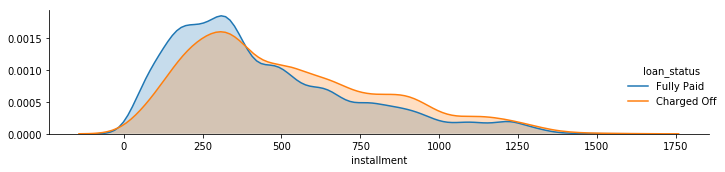

In [0]:
#Higher the number of instalments, higher is the risk of bad debts
feature_plot('installment', continuous=True)

In [0]:
#statistics
My_df_targetboolean['installment'].describe()

count    32334.000000
mean       445.520253
std        291.910708
min         30.120000
25%        225.600000
50%        363.790000
75%        609.820000
max       1587.230000
Name: installment, dtype: float64

**Features: fico_range_low, fico_range_high**

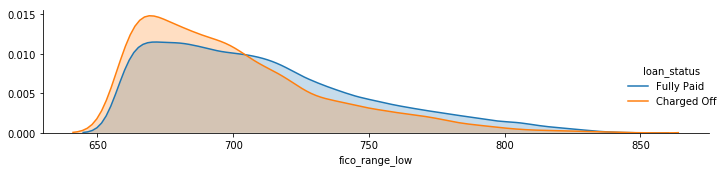

In [0]:
#Higher the fico scores, lesser are the chances of loan charge offs
feature_plot('fico_range_low', continuous=True)

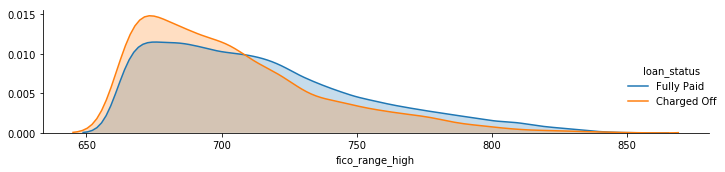

In [0]:
#Higher the fico scores, lesser are the chances of loan charge offs
feature_plot('fico_range_high', continuous=True)

**Feature annual_inc**

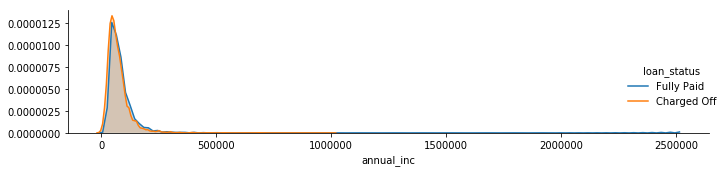

In [0]:
feature_plot('annual_inc', continuous=True)

In [0]:
My_df_targetboolean['installment'].describe()

count    32334.000000
mean       445.520253
std        291.910708
min         30.120000
25%        225.600000
50%        363.790000
75%        609.820000
max       1587.230000
Name: installment, dtype: float64

In [0]:
#Higher the annual incomes,lesser the chances of bad debts
My_df_targetboolean.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5212.0,71478.051919,51715.483266,0.0,41000.0,60000.0,87000.0,1000000.0
1,27122.0,80576.982274,62486.702282,0.0,48000.0,68000.0,96000.0,2500000.0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


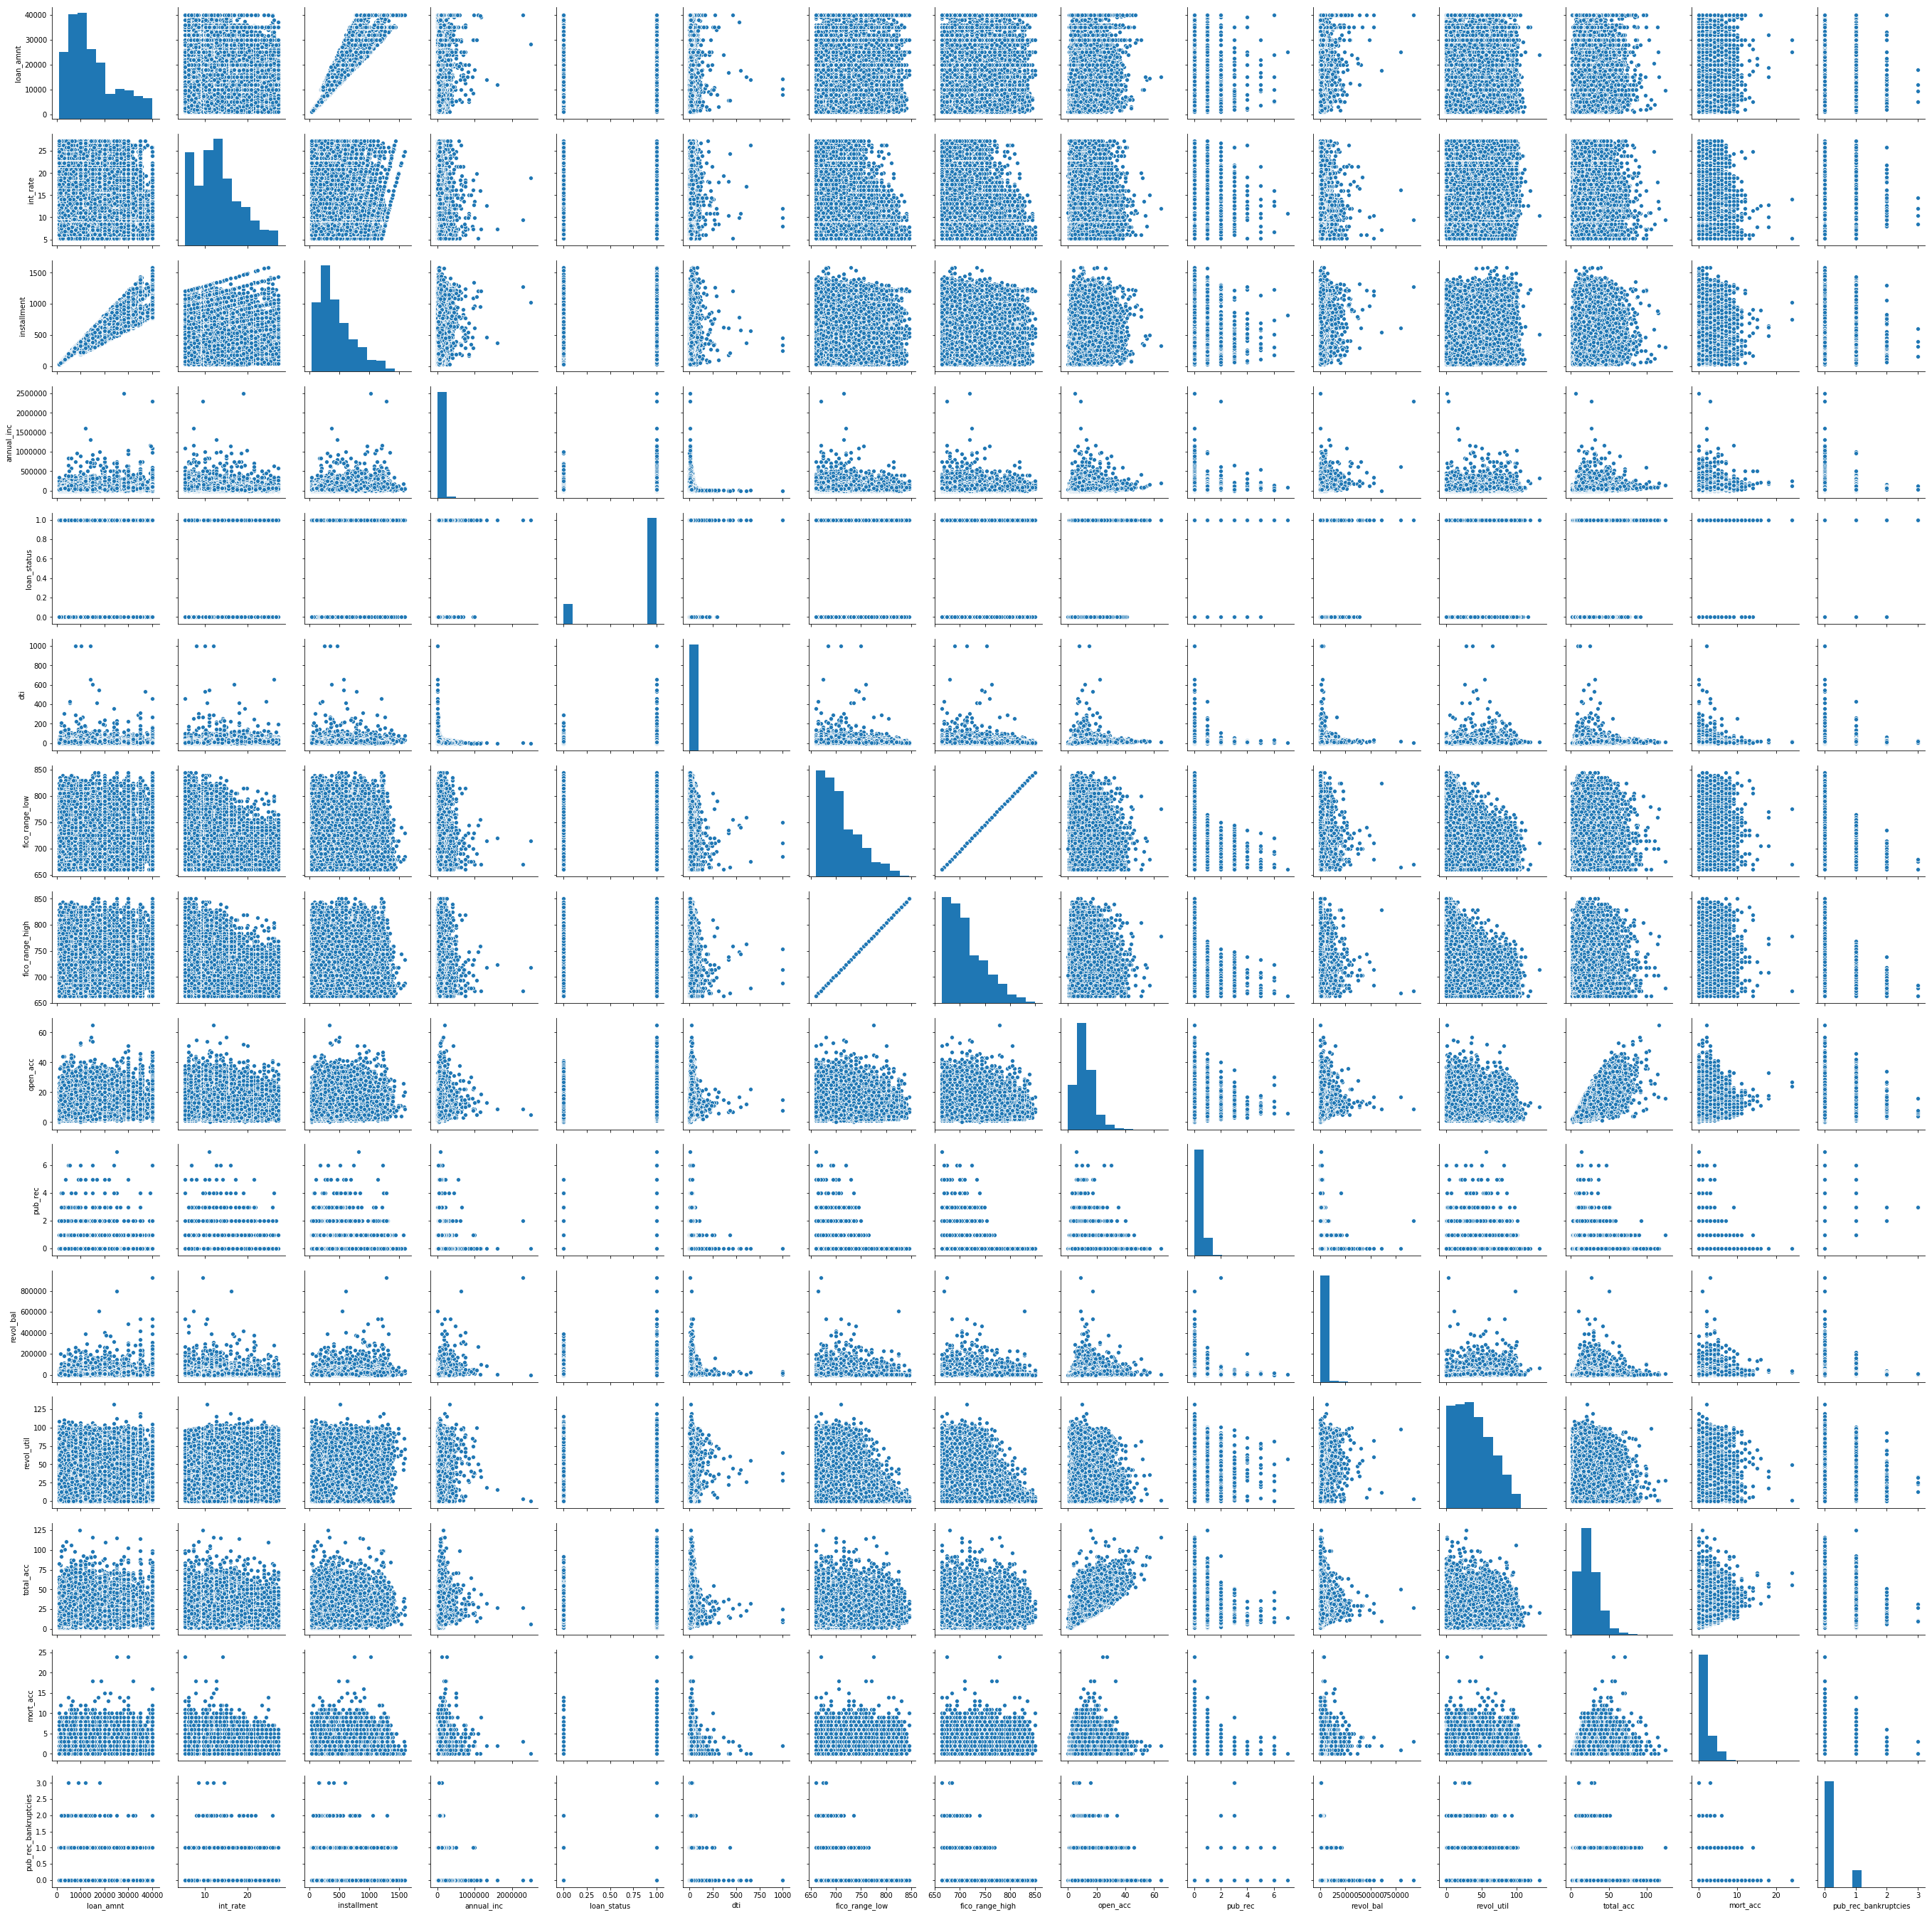

In [0]:
#Scatter matrix
sns.pairplot(My_df_targetboolean)

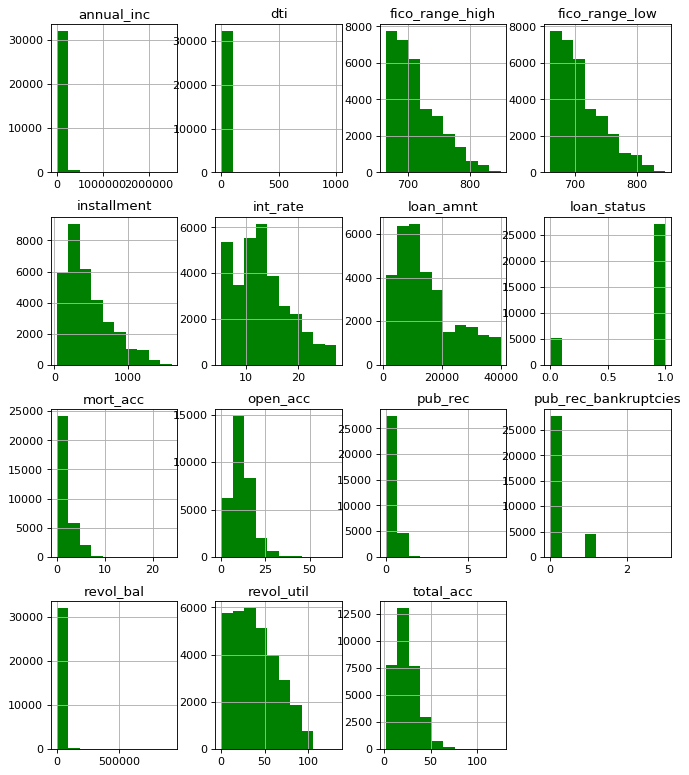

In [0]:
# histograms
plt.rcParams.update({'figure.figsize':(10,12), 'figure.dpi':80})
My_df_targetboolean.hist(color = "green" )
plt.show()

**Feature pub_rec_bankruptcies**

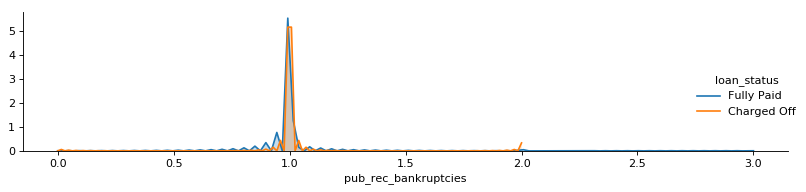

In [0]:
feature_plot('pub_rec_bankruptcies', continuous=True)

In [0]:
My_df_targetboolean['pub_rec_bankruptcies'].value_counts().sort_index()
#bankruptcies records hold positive correlation with loan charged offs

0    27751
1     4524
2       54
3        5
Name: pub_rec_bankruptcies, dtype: int64

2. Deal with categorical data

In [0]:
#Dataframe information
My_df_targetboolean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32334 entries, 4 to 236049
Data columns (total 29 columns):
loan_amnt               32334 non-null int64
term                    32334 non-null object
int_rate                32334 non-null float64
installment             32334 non-null float64
grade                   32334 non-null object
sub_grade               32334 non-null object
emp_title               29318 non-null object
emp_length              29507 non-null object
home_ownership          32334 non-null object
annual_inc              32334 non-null float64
verification_status     32334 non-null object
loan_status             32334 non-null int64
purpose                 32334 non-null object
title                   32334 non-null object
zip_code                32334 non-null object
addr_state              32334 non-null object
dti                     32242 non-null float64
earliest_cr_line        32334 non-null datetime64[ns]
fico_range_low          32334 non-null int64
fico_ra

In [0]:
#locate the object datatypes
object_features = My_df_targetboolean.select_dtypes(include=['object']).copy()
object_features.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,purpose,title,zip_code,addr_state,initial_list_status,application_type
4,36 months,A,A4,Scale Technician,9 years,RENT,Source Verified,major_purchase,Major purchase,988xx,WA,w,Individual
16,36 months,B,B5,SDO Supervisor,10+ years,OWN,Not Verified,other,Other,300xx,GA,w,Individual
23,36 months,B,B5,Parole,< 1 year,MORTGAGE,Verified,home_improvement,Home improvement,797xx,TX,w,Individual
38,36 months,D,D5,teacher,10+ years,OWN,Verified,debt_consolidation,Debt consolidation,341xx,FL,w,Individual
40,60 months,D,D4,Machine operator,10+ years,OWN,Source Verified,house,Home buying,135xx,NY,w,Individual


In [0]:
My_df_targetboolean['emp_title'].describe()
# A large number of employee titles, variable can be dropped for better results

count       29318
unique      14157
top       Manager
freq          550
Name: emp_title, dtype: object

In [0]:
#variables “grage”, “zip_code" are found similar to “sub_grade”, “addr_state” respectively
#Drop "grade","zip_code",emp_title
My_df_targetboolean = My_df_targetboolean.drop(['grade','zip_code','emp_title'], axis = 1)

In [0]:
My_df_targetboolean.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
4,3000,36 months,7.34,93.10,A4,9 years,RENT,52000.0,Source Verified,1,major_purchase,Major purchase,WA,0.58,1998-01-01,760,764,7,0,141,0.5,30,w,Individual,4,0
16,5000,36 months,11.98,166.03,B5,10+ years,OWN,55000.0,Not Verified,1,other,Other,GA,14.18,2001-08-01,675,679,14,1,11449,33.9,24,w,Individual,0,1
23,7000,36 months,11.98,232.44,B5,< 1 year,MORTGAGE,40000.0,Verified,1,home_improvement,Home improvement,TX,20.25,2007-03-01,695,699,13,0,5004,36.0,29,w,Individual,0,0
38,30000,36 months,21.85,1143.39,D5,10+ years,OWN,57000.0,Verified,1,debt_consolidation,Debt consolidation,FL,27.58,2000-04-01,680,684,11,0,29222,53.2,26,w,Individual,2,0
40,21000,60 months,20.39,560.94,D4,10+ years,OWN,85000.0,Source Verified,1,house,Home buying,NY,15.76,2008-11-01,665,669,15,0,14591,34.2,27,w,Individual,3,0


**Turning categorical variables to dummy variables**

In [0]:
#List and print categorical variables
dummy_vars = ['term','sub_grade','emp_length','home_ownership','verification_status','purpose','title','addr_state','initial_list_status','application_type']
dummy_vars

['term',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'title',
 'addr_state',
 'initial_list_status',
 'application_type']

In [0]:
#Turn categorical variables to dummy variables
My_df_targetboolean1 = pds.get_dummies(My_df_targetboolean,columns=dummy_vars,drop_first=True)

In [0]:
My_df_targetboolean1.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,...,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
4,3000,7.34,93.10,52000.0,1,0.58,1998-01-01,760,764,7,0,141,0.5,30,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
16,5000,11.98,166.03,55000.0,1,14.18,2001-08-01,675,679,14,1,11449,33.9,24,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
23,7000,11.98,232.44,40000.0,1,20.25,2007-03-01,695,699,13,0,5004,36.0,29,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
38,30000,21.85,1143.39,57000.0,1,27.58,2000-04-01,680,684,11,0,29222,53.2,26,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
40,21000,20.39,560.94,85000.0,1,15.76,2008-11-01,665,669,15,0,14591,34.2,27,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
#Drop date and time variable for simplicity
My_df_targetboolean1.drop(["earliest_cr_line"], axis = 1, inplace = True)

In [0]:
My_df_targetboolean1.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,...,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
4,3000,7.34,93.10,52000.0,1,0.58,760,764,7,0,141,0.5,30,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
16,5000,11.98,166.03,55000.0,1,14.18,675,679,14,1,11449,33.9,24,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
23,7000,11.98,232.44,40000.0,1,20.25,695,699,13,0,5004,36.0,29,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
38,30000,21.85,1143.39,57000.0,1,27.58,680,684,11,0,29222,53.2,26,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
40,21000,20.39,560.94,85000.0,1,15.76,665,669,15,0,14591,34.2,27,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
My_df_targetboolean1.describe()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,...,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
count,32334.000000,32334.000000,32334.000000,3.233400e+04,32334.000000,32242.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32296.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,...,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000
mean,14936.640224,13.178539,445.520253,7.911030e+04,0.838807,18.475431,708.741572,712.741727,11.367941,0.166357,14436.345952,39.356487,24.005165,1.541195,0.143719,0.258428,0.043113,0.048339,0.054246,0.050071,0.055855,0.053504,0.047906,0.054432,0.059535,0.055019,0.052638,0.055205,0.054741,0.049422,0.037051,0.036958,0.034824,0.031979,0.034329,0.008381,0.010794,0.011814,0.010268,0.013020,...,0.004175,0.033123,0.016484,0.007175,0.008505,0.009928,0.022979,0.025051,0.002629,0.026783,0.017721,0.015216,0.006000,0.002938,0.028639,0.002072,0.005010,0.004268,0.031515,0.004948,0.018804,0.075679,0.029350,0.009247,0.012371,0.030525,0.004546,0.013144,0.001515,0.015371,0.082266,0.009804,0.026536,0.002196,0.024092,0.013330,0.004948,0.001979,0.811561,0.127822
std,10111.193853,5.196571,291.910708,6.097058e+04,0.367714,18.121250,38.048007,38.048563,5.863349,0.424637,21819.789984,25.460796,12.670800,1.841109,0.356841,0.437777,0.203114,0.214485,0.226507,0.218095,0.229644,0.225040,0.213571,0.226871,0.236627,0.228022,0.223313,0.228384,0.227478,0.216750,0.188889,0.188662,0.183337,0.175946,0.182076,0.091166,0.103332,0.108051,0.100810,0.113363,...,0.064482,0.178961,0.127330,0.084403,0.091831,0.099143,0.149838,0.156283,0.051205,0.161451,0.131939,0.122414,0.077227,0.054125,0.166791,0.045474,0.070606,0.065191,0.174707,0.070171,0.135833,0.264488,0.168788,0.095718,0.110536,0.172030,0.067274,0.113893,0.038900,0.123024,0.274774,0.098530,0.160724,0.046809,0.153338,0.114684,0.070171,0.044446,0.391069,0.333897
min,1000.000000,5.310000,30.120000,0.000000e+00,0.000000,0.000000,660.000000,664.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

#Methodology and Evaluations

##Methodology 

After data exploration is over, numerical and dummy (converted categorical) variables are used to build the model. Data set is further validated against infinite, NaN values and any found values are assigned 0 value. Input and output target variable are split up, and input variables are scaled(normalized) to attain 0 mean and 1 SD (standard deviation) distribution.

Input and output data set is split into training and testing data, with 75% of data for training and 25% of data for model testing purposes. It's because the better the model is trained, the more its performance will be. For modelling, sklearn library and inbuilt packages are used.

###Models used – Decision tree classifier, Random forest classifier, Support vector machine, k-nearest neighbor classifier

Decision tree classifier is used with both unscaled and scaled dataset to observe the differences, however being a tree-based algorithm scaling does not have a significant impact on the performances.

Random forest classifier is used with unscaled data, and parameter tuning has been done to observe the changes. oob_score = true is used for cross-validation as the data set is unbalanced data set. With Bootstrap = true, Random forest bootstraps each of the tree and uses a random subset of samples. Number of n_estimators (number of trees) has been found from roc_auc score plot against n_estimators, and it has been observed that after n_estimators  > 2 test performance decreases. No restriction has been provided on the number of processors(n_jobs =-1).

Support vector machine has been used with scaled data set to avoid dominance effect of the data values with larger magnitudes while calculating the distances.

K-nearest neighbour algorithm has been implemented on the scaled data set with the value of k = 1, and 5 to compare the model performances in both the circumstances. To further enhance the results of KNN, Principal component analysis has been done for dimensionality reductions and comparison has been made.


##Evaluation
As the data set is unbalanced, Accuracy score can’t be a reliable parameter to measure the model performances. Henceforth, the model performances are accessed concerning the classification report (F1 score), confusion matrix, and roc_auc score. Support vector machine didn’t perform well, and f1_score for the class (0 – loan status Charge Off) is found as 0.01, so as the true negative data points in confusion matrix, whereas Decision tree, K-nearest neighbour and random forest classifiers performed fairly well.

Decision tree being a tree-based algorithm performed similarly for both scaled and unscaled data sets, with a unit rise in the F1 score for the negative class in case of scaled data inputs. Random forest classifier performed well after n_estimators parameter tuning (changed the number of estimators from 10 to 2) for negative class value, but not for positive class value(as observed from the F1 score). 

K-nearest neighbour model is evaluated by changing the value of k from 1 to 5, and it is observed that F1 score reduced to half for negative class and very slightly increased for positive class with this change in the value of k. The model is further evaluated by doing PCA (number of components 10) and with k value as 1. The PCA-KNN model produced almost similar results to KNN model with K= 1.





#Modelling

Deal with infinite and NAN data values

In [0]:
npy.isfinite(My_df_targetboolean1.all()) 

loan_amnt                     True
int_rate                      True
installment                   True
annual_inc                    True
loan_status                   True
dti                           True
fico_range_low                True
fico_range_high               True
open_acc                      True
pub_rec                       True
revol_bal                     True
revol_util                    True
total_acc                     True
mort_acc                      True
pub_rec_bankruptcies          True
term_ 60 months               True
sub_grade_A2                  True
sub_grade_A3                  True
sub_grade_A4                  True
sub_grade_A5                  True
sub_grade_B1                  True
sub_grade_B2                  True
sub_grade_B3                  True
sub_grade_B4                  True
sub_grade_B5                  True
sub_grade_C1                  True
sub_grade_C2                  True
sub_grade_C3                  True
sub_grade_C4        

In [0]:
My_df_targetboolean1[npy.isfinite(My_df_targetboolean1) == False] = 0

In [0]:
npy.isnan(My_df_targetboolean1.values.any())

False

In [0]:
#splitting the unscaled data set into input and output(target variable) sets
Input = My_df_targetboolean1.drop(['loan_status'], axis = 1)
Output = My_df_targetboolean1['loan_status']
Input.head()

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,emp_length_10+ years,...,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
4,3000,7.34,93.10,52000.0,0.58,760,764,7,0,141,0.5,30,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
16,5000,11.98,166.03,55000.0,14.18,675,679,14,1,11449,33.9,24,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
23,7000,11.98,232.44,40000.0,20.25,695,699,13,0,5004,36.0,29,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
38,30000,21.85,1143.39,57000.0,27.58,680,684,11,0,29222,53.2,26,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
40,21000,20.39,560.94,85000.0,15.76,665,669,15,0,14591,34.2,27,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
#Standard scaling of features
from sklearn.preprocessing import StandardScaler
Input_s = StandardScaler().fit_transform(Input)
Input_s

array([[-1.18055543, -1.12355423, -1.20730653, ..., -0.04453388,
         0.48186502, -0.38282514],
       [-0.98275179, -0.23064397, -0.95746599, ..., -0.04453388,
         0.48186502, -0.38282514],
       [-0.78494815, -0.23064397, -0.7299614 , ..., -0.04453388,
         0.48186502, -0.38282514],
       ...,
       [ 0.10516822, -1.34485742, -0.46169028, ..., -0.04453388,
        -2.07526997, -0.38282514],
       [-0.4882427 , -0.20177834, -0.38625509, ..., -0.04453388,
         0.48186502, -0.38282514],
       [ 0.0062664 ,  1.01442701, -0.20873231, ..., -0.04453388,
         0.48186502, -0.38282514]])

In [0]:
#dataset splitting into training and testing set: unscaled input data
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(Input, Output, test_size = 1/4, random_state = 0)

In [0]:
#dataset splitting into training and testing set: scaled input data
from sklearn.model_selection import train_test_split
X_Train1, X_Test1, Y_Train1, Y_Test1 = train_test_split(Input_s, Output, test_size = 1/4, random_state = 0)

**Output variable description**

0 - Charged Off
1 - Fully Paid

#Decision tree


**Decision tree with unscaled data**

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dcsntree = DecisionTreeClassifier()

In [0]:
dcsntree.fit(X_Train,Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Prediction and evaluation of decision tree**

In [0]:
Predictions_dt = dcsntree.predict(X_Test)


In [0]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score 
from sklearn.metrics import roc_auc_score
#classification report
print(classification_report(Y_Test,Predictions_dt))

              precision    recall  f1-score   support

           0       0.23      0.24      0.24      1313
           1       0.85      0.84      0.85      6771

    accuracy                           0.75      8084
   macro avg       0.54      0.54      0.54      8084
weighted avg       0.75      0.75      0.75      8084



In [0]:
#roc_auc_score for loan status: Charged Off
prob_test = dcsntree.predict_proba(X_Test)
prob_test = prob_test[:, 0]
AUC = roc_auc_score(Y_Test, prob_test)
AUC

0.45704216820918653

In [0]:
confusion_matrix(Y_Test,Predictions_dt)

array([[ 317,  996],
       [1053, 5718]])

In [0]:
accuracy_score(Y_Test, Predictions_dt)

0.7465363681345868

**Decision tree classifier with scaled data**


In [0]:
dcsntree1 = DecisionTreeClassifier()
dcsntree1.fit(X_Train1,Y_Train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Prediction and evaluation of decision tree**

Tree based classifiers not much affected by dataset scaling

In [0]:
Predictions_dt1 = dcsntree1.predict(X_Test1)
print(classification_report(Y_Test1,Predictions_dt1))

              precision    recall  f1-score   support

           0       0.23      0.24      0.24      1313
           1       0.85      0.85      0.85      6771

    accuracy                           0.75      8084
   macro avg       0.54      0.54      0.54      8084
weighted avg       0.75      0.75      0.75      8084



In [0]:
confusion_matrix(Y_Test1,Predictions_dt1)

array([[ 316,  997],
       [1040, 5731]])

In [0]:
#roc_auc_score for loan status: Charged Off
prob_test1 = dcsntree1.predict_proba(X_Test1)
prob_test1 = prob_test1[:, 0]
AUC1 = roc_auc_score(Y_Test1, prob_test1)
AUC1

0.45646299915087446

#Random forest

Random forest classifier with unscaled data

Being a tree based classifier model scaling is not required for this

In [0]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators= 10,random_state=None)
RFC.fit(X_Train,Y_Train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
Predictions_RFC = RFC.predict(X_Test)
print(classification_report(Y_Test,Predictions_RFC))

              precision    recall  f1-score   support

           0       0.35      0.10      0.16      1313
           1       0.85      0.96      0.90      6771

    accuracy                           0.82      8084
   macro avg       0.60      0.53      0.53      8084
weighted avg       0.77      0.82      0.78      8084



In [0]:
confusion_matrix(Y_Test,Predictions_RFC)

array([[ 135, 1178],
       [ 251, 6520]])

In [0]:
#roc_auc_score for loan status: Charged Off
prob_test_rf = RFC.predict_proba(X_Test)
prob_test_rf = prob_test_rf[:, 0]
AUC_rf = roc_auc_score(Y_Test, prob_test_rf)
AUC_rf

0.3635716610071423

**Parameter tuning**


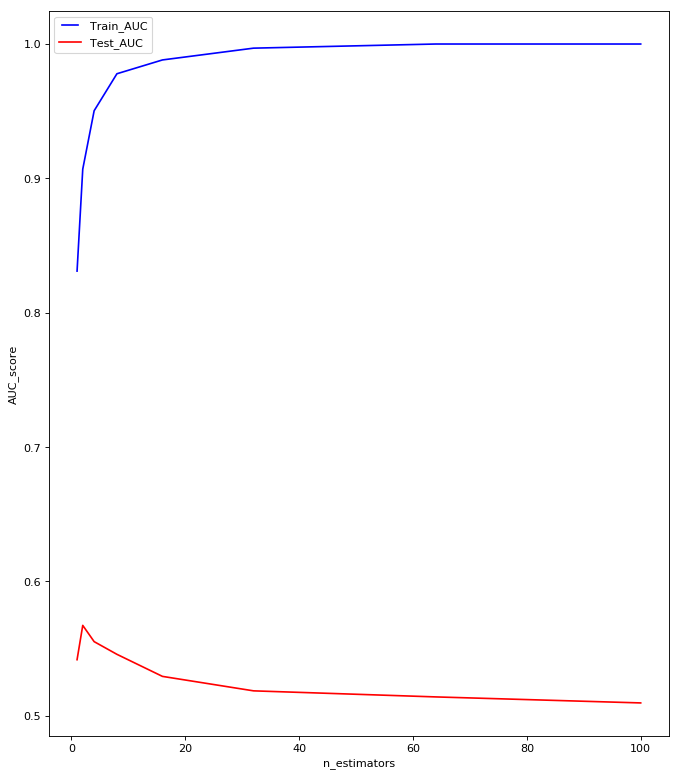

In [0]:
#n_estimators (number of trees) tuning
from sklearn.metrics import roc_curve, auc

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
train_results = []
test_results = []
for estimator in n_estimators:
   rfc = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rfc.fit(X_Train, Y_Train)
  
   X_Train_Pred = rfc.predict(X_Train)
   false_negative_rate, true_negative_rate, thresholds = roc_curve(Y_Train, X_Train_Pred)
   roc_auc = auc(false_negative_rate, true_negative_rate)
   train_results.append(roc_auc)
  
   X_Test_Pred = rfc.predict(X_Test)
   false_negative_rate, true_negative_rate, thresholds = roc_curve(Y_Test, X_Test_Pred)
   roc_auc = auc(false_negative_rate, true_negative_rate)
   test_results.append(roc_auc)
  
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train_AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test_AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC_score')
plt.xlabel('n_estimators')
plt.show()

**Observation from n_estimators tuning**

Increase in the number of trees(n_estimators) after 2, slowed down the test performance as observed from above AUC_score plot.

#Random forest with n_estimators = 2

In [0]:
RFC1=RandomForestClassifier(n_estimators= 2,random_state=None)
RFC1.fit(X_Train,Y_Train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
Predictions_RFC1 = RFC1.predict(X_Test)
print(classification_report(Y_Test,Predictions_RFC1))

              precision    recall  f1-score   support

           0       0.21      0.37      0.27      1313
           1       0.86      0.73      0.79      6771

    accuracy                           0.67      8084
   macro avg       0.54      0.55      0.53      8084
weighted avg       0.75      0.67      0.71      8084



In [0]:
confusion_matrix(Y_Test,Predictions_RFC1)

array([[ 488,  825],
       [1808, 4963]])

In [0]:
#roc_auc_score for loan status: Charged Off
prob_test_rf1 = RFC1.predict_proba(X_Test)
prob_test_rf1 = prob_test_rf1[:, 0]
AUC_rf1 = roc_auc_score(Y_Test, prob_test_rf1)
AUC_rf1

0.4456298719405357

#Support vector machine

In [0]:
#Model building and Training
from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'rbf', random_state = 0, gamma = 'auto')
#scaled data used for SVM
SVM_classifier.fit(X_Train1, Y_Train1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

**Model prediction and avaluation**

In [0]:
Predictions_SVM1 = SVM_classifier.predict(X_Test1)
print(classification_report(Y_Test1,Predictions_SVM1))

              precision    recall  f1-score   support

           0       0.31      0.00      0.01      1313
           1       0.84      1.00      0.91      6771

    accuracy                           0.84      8084
   macro avg       0.57      0.50      0.46      8084
weighted avg       0.75      0.84      0.76      8084



In [0]:
confusion_matrix(Y_Test1,Predictions_SVM1)

array([[   4, 1309],
       [   9, 6762]])

#K-nearest neighbor

Scaled data has been used for better results, as it chooses the nearest neighbour (distance between two points matter)

**n_neighbours = 1**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn1= KNeighborsClassifier(n_neighbors = 1)
knn1.fit(X_Train1, Y_Train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
Predictions_knn1 = knn1.predict(X_Test1)
print(classification_report(Y_Test1,Predictions_knn1))

              precision    recall  f1-score   support

           0       0.23      0.21      0.22      1313
           1       0.85      0.87      0.86      6771

    accuracy                           0.76      8084
   macro avg       0.54      0.54      0.54      8084
weighted avg       0.75      0.76      0.75      8084



In [0]:
confusion_matrix(Y_Test1,Predictions_knn1)

array([[ 271, 1042],
       [ 903, 5868]])

In [0]:
#roc_auc_score for loan status: Charged Off
pt = knn1.predict_proba(X_Test1)
pt = pt[:, 0]
AUC_knn = roc_auc_score(Y_Test1, pt)
AUC_knn


0.4634826541172913

**n_neighbours = 5**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn2= KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X_Train1, Y_Train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
Predictions_knn2 = knn2.predict(X_Test1)
print(classification_report(Y_Test1,Predictions_knn2))

              precision    recall  f1-score   support

           0       0.26      0.07      0.11      1313
           1       0.84      0.96      0.90      6771

    accuracy                           0.82      8084
   macro avg       0.55      0.52      0.50      8084
weighted avg       0.75      0.82      0.77      8084



#PCA and KNN

In [0]:
#Princpal component analysis(PCA) technique for dimensionality reductions
from sklearn.decomposition import PCA
PCA_loandata = PCA(n_components=10)
Input_sp = PCA_loandata.fit_transform(Input_s)
Input_sp

array([[-4.40141743, -0.34987734, -1.78732082, ..., -3.85715826,
        -2.81188347,  0.24217531],
       [-0.97465341, -2.40992724,  0.83948565, ..., -0.3886002 ,
        -0.87219911, -0.80003064],
       [-1.19353903,  0.5134349 ,  1.44318602, ..., -1.03583629,
         1.12917641, -0.93106122],
       ...,
       [-2.26253357, -1.41907512,  1.10281636, ...,  0.16346935,
         0.28970931, -0.34243185],
       [-2.29407851, -0.96517058,  1.03013004, ...,  0.23561878,
         0.24760773, -0.04754614],
       [ 1.7170171 , -0.54108876, -1.3060925 , ..., -0.06576959,
         0.30436193,  0.12792395]])

In [0]:
#dataset splitting: After scaling and PCA
from sklearn.model_selection import train_test_split
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(Input_sp, Output, test_size = 1/4, random_state = 0)

In [0]:
knn2_PCA= KNeighborsClassifier(n_neighbors = 1)
knn2_PCA.fit(X_Train2, Y_Train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
Predictions_knn2PCA = knn2_PCA.predict(X_Test2)
print(classification_report(Y_Test2,Predictions_knn2PCA))

              precision    recall  f1-score   support

           0       0.23      0.23      0.23      1313
           1       0.85      0.85      0.85      6771

    accuracy                           0.75      8084
   macro avg       0.54      0.54      0.54      8084
weighted avg       0.75      0.75      0.75      8084



In [0]:
#roc_auc_score for loan status: Charged Off
prob_test_knn = knn2_PCA.predict_proba(X_Test2)
prob_test_knn = prob_test_knn[:, 0]
AUC_knn1 = roc_auc_score(Y_Test2, prob_test_knn)
AUC_knn1

0.4578689660656874

#Conclusion

Lending club loan data set 2018 has been used to build a machine learning model to predict the probability of loan being charged off, and as a result, the investor will not receive the full amount invested. In this project four different models, Decision tree classifier, Random forest classifier, Support vector machine, k-nearest neighbor classifier are trained, and their performances are evaluated based on the F1 score(classification report), and confusion matrix summary report. Decision tree, KNN and random forest models are found to perform similarly, whereas PCA -KNN model is preferred over the others because of faster results, and the larger number of features in the data set. The method of dimensionality reductions, work well with a larger volume of data and reduces the number of variables by preserving the essential information and can be the right choice for the lending club loan data set.

#Ethics

The chosen PCA-KNN model has attained an accuracy of 75% with a certain amount of data which may not be optimum for the investors. Utilizing the Kantian duty-based approach, some of the consequences are not taken into account. In case a few potential customers are misclassified, and the investors do not issue the loans, the marketplace might lose the customers in this context. 

Utilising utilitarian approach of ethical theories potential misuses of the model can be the followings.

If the decisions are taken only based on the model predictions, the above-mentioned customers might lose trust on the company as a result of bad user experiences. Often the customers might feel that they are treated as paranoids and being tracked. Machine learning only provides probabilistic responses and thus, the investors should use it carefully while making their decisions. Prediction results are the indicators, and other verification should happen whenever necessary.

For ethical and social aspects of data science, I have used the publicly available data set from Kaggle. Personal details, i.e. borrower member_id, "desc" (loan description provided by the borrower) are wholly deleted from the data set. Along with this, many other features are identified with more than 80% missing information. For model robustness attributes with more than 30% of missing values are dropped from the data set. Variable “id”(unique borrower listing id) is dropped from the data set, considering it’s zero effect on analysis and model performances.




#References

Kaggle 2019, *All lending club loan data*, viewed 22 September 2019,
<https://www.kaggle.com/wordsforthewise/lending-club> 

Lending club 2019, *Helping Americans meet their life goals*, United states, viewed 22 September 2019,
<https://www.lendingclub.com/company/about-us>

Udemy 2019, *Python for data science and machine learning bootcamp*, viewed 20 September 2019,
<https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/>

